**Table of contents**<a id='toc0_'></a>    
- [Introducción del proyecto](#toc1_)    
  - [Objetivo](#toc1_1_)    
- [Descripción de datos](#toc2_)    
  - [Conclusión](#toc2_1_)    
- [Tratamiento, limpieza y enriquecimiento de datos](#toc3_)    
  - [Eliminación de datos duplicados](#toc3_1_)    
  - [Tratamiento de Valores nulos](#toc3_2_)    
  - [Creación de nuevas columnas](#toc3_3_)    
  - [Conclusión](#toc3_4_)    
- [EDA (Análisis Estadístico de Datos)](#toc4_)    
  - [Gastos negativos](#toc4_1_)    
  - [Productos más comprados](#toc4_2_)    
  - [Precios de los productos más comprados](#toc4_3_)    
  - [Precios de los productos más caros](#toc4_4_)    
  - [Región con más productos vendidos](#toc4_5_)    
  - [Regiones con clientes únicos](#toc4_6_)    
  - [Ventas por región](#toc4_7_)    
  - [Ventas mensuales](#toc4_8_)    
  - [Ventas mensuales por región](#toc4_9_)    
  - [Meses con más ventas](#toc4_10_)    
  - [Horas con más ventas](#toc4_11_)    
  - [Días de la semana con más ventas](#toc4_12_)    
  - [Productos más vendidos en UK](#toc4_13_)    
- [Construcción del modelo](#toc5_)    
  - [Creación de Tabla RFM](#toc5_1_)    
- [Conclusión Final](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introducción del proyecto](#toc0_)

En un mundo donde las empresas dependen cada vez más de los datos para tomar decisiones estratégicas, la capacidad de segmentar clientes de manera efectiva se vuelve crucial. La segmentación de clientes es una herramienta que permite a las empresas personalizar sus estrategias de marketing, mejorar la retención de clientes y maximizar el valor del cliente a lo largo del tiempo.

En este proyecto se desarrolla la metodología **RFM**, que por sus siglas en inglés, hace 
referencia a los siguientes conceptos: _Recency_ indica que tan reciente es una compra, 
_Frequency_ que hace referencia a que tan frecuente es una compra y, por último, _Monetary_ que se refiere al gasto monetario que el cliente hace al consumir los productos.

## <a id='toc1_1_'></a>[Objetivo](#toc0_)
Este proyecto tiene como objetivo desarrollar una aplicación web interactiva que permita a los científicos de datos realizar análisis de segmentación de clientes utilizando el modelo RFM (Recencia, Frecuencia, Valor Monetario). La aplicación proporcionará herramientas para cargar datos, realizar análisis exploratorio y visualizar los resultados de segmentación mediante gráficos interactivos.

# <a id='toc2_'></a>[Descripción de datos](#toc0_)
En esta etapa se realizará una visualización general sobre los datos con los que se trabajarán, de esta manera se puede hacer un mejor preprocesamiento sobre los datos, mejorando así la calidad de los datos y facilitando el análisis más eficiente en las fases posteriores.

Al finalizar esta sección se espera haber observado errores en los datos, si es que se encuentran valores duplicados o ausentes que puedan generar ruido para realizar el análisis posterior y eviten cumplir correctamente con el objetivo del proyecto.

In [104]:
# Librerias
import pandas as pd
import datetime as dt
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [105]:
# Obteniendo dataset
df = pd.read_csv('https://raw.githubusercontent.com/MaElmoon39/RetailSaviors/main/notebooks/datasets/Online_Retail.csv', 
                 encoding='unicode_escape')

# Visualización de dataset
df.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


In [106]:
# Visualización de información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [107]:
# Verificación de valores duplicados
print('Valores duplicados:', df.duplicated().sum())

# Visualización de ejemplos de duplicados
df[(df['DESCRIPTION']== 'UNION JACK FLAG LUGGAGE TAG') & (df['CUSTOMER_ID']== 17908.0)]

Valores duplicados: 5268


,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01/12/2019 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01/12/2019 11:45,1.25,17908.0,United Kingdom


In [108]:
# Verificación de valores nulos
df.isna().sum()

INVOICE_NO           0
STOCK_CODE           0
DESCRIPTION       1454
QUANTITY             0
INVOICE_DATE         0
UNIT_PRICE           0
CUSTOMER_ID     135080
REGION               0
dtype: int64

In [109]:
#Visualización de cantidad de valores únicos
df.nunique()

INVOICE_NO      25900
STOCK_CODE       4070
DESCRIPTION      4214
QUANTITY          722
INVOICE_DATE    23260
UNIT_PRICE       1630
CUSTOMER_ID      4372
REGION             38
dtype: int64

In [110]:
# Descripcion del dataset
df.describe()

,QUANTITY,UNIT_PRICE,CUSTOMER_ID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [111]:
# Observación de valores negativos en unit_price
df[(df['UNIT_PRICE']< 0)]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
299983,A563186,B,Adjust bad debt,1,12/08/2020 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12/08/2020 14:52,-11062.06,NaN,United Kingdom


In [112]:
# Observación de valores negativos en quantity
df[(df['QUANTITY']< 0)]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
141,C536379,D,Discount,-1,01/12/2019 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2019 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2019 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2019 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2019 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09/12/2020 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09/12/2020 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09/12/2020 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09/12/2020 11:58,1.25,17315.0,United Kingdom


## <a id='toc2_1_'></a>[Conclusión](#toc0_)
Se observa que el dataset está formado por un total de 541909 filas y 8 columnas que representan lo siguiente:

* `INVOICE_NO`: Número de orden
* `STOCK_CODE`: Código del producto
* `DESCRIPTION`: Descripción del producto
* `QUANTITY`: Cantidad de producto seleccionado
* `INVOICE_DATE`: Fecha de compra
* `UNIT_PRICE`: Precio unitario
* `CUSTOMER ID`: Número de cliente
* `REGION`: País de compra

Se cuentan con un total de 5268 valores duplicados que pueden ser eliminados dado que tenemos un ID de identificación. También se observa que dos de las columnas presentan valores nulos. Observamos la cantidad de valores únicos de cada columna. Por último en la descripción de la tabla se aprecian valores negativos en las columnas `QUANTITY` y `UNIT_PRICE`, estos valores negativos pueden representar devoluciones o descuentos por lo que se mantendrán para mejorar el análisis.

Las siguientes acciones a tomar son:

* Cambio por minusculas los nombres de las columnas.
* Eliminación de valores duplicados.
* Tratamiento de valores nulos.
* Creación de columnas útiles y corrección de los tipos de datos.

Para ello vamos a realizar una copia de nuestra tabla original y será sobre la que se realicen las operaciones.

# <a id='toc3_'></a>[Tratamiento, limpieza y enriquecimiento de datos](#toc0_)

## <a id='toc3_1_'></a>[Eliminación de datos duplicados](#toc0_)
Dado que los valores duplicados pueden generar más información al realizar los análisis, se decide por su eliminación. Como se observo anteriormente, no parecen proporcionar una nueva información a los datos. Aunque se desconoce la razón de la existencia de estos duplicados, se puede asumir que es debido a un error generado al realizar el registro de los mismos.

In [113]:
# Crear copia del dataset
df_new = df.copy()

# Cambio a minúsculas de los nombres de las columnas
df_new.columns = df_new.columns.str.lower()

# Verificación del cambio
df_new.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'region'],
      dtype='object')

In [114]:
# Eliminación de valores duplicados
df_new = df_new.drop_duplicates().reset_index(drop = True)

# Comprobando que no queden valores duplicados
df_new.duplicated().sum()

0

## <a id='toc3_2_'></a>[Tratamiento de Valores nulos](#toc0_)

Ahora se realiza una observación para saber si se puede imputar la columna de `customer_id`, para ello se hace un análisis para ver si se pueden encontrar algunos de los valores usando la columna `invoice_no`, así ver si existe algún pedido relacionado con algún cliente del cuál se conozca su ID.

In [115]:
# Adquisición de invoice donde se encuentra los customer_id con valores nulos
invoice_customer=df_new['invoice_no'][df_new['customer_id'].isna()]

# Tabla que contiene customer_id de acuerdo al invoice obtenido anteriormente
df_new['customer_id'][df_new['invoice_no'].isin(invoice_customer)].dropna().reset_index()

,index,customer_id


No se tiene algún valor para imputar, al querer realizar una segmentación y no tener un ID conocido no podemos modificar con algún valor fijo, ya que esto puede causar tener más peso a este tipo de clientes y provocar segmentaciones erroneas; tampoco se le puede asignar un valor aleatorio por que no se sabe si un cliente pudo haber realizado más de una compra.

Posiblemente esos valores ausentes puedan referirse a clientes que realizaron las compras usando sesiones de invitado, por lo que no es parte de los registros, y al no ser muy útil esta información para la segmentación se decide realizar la eliminación de estos, a pesar de que represente una gran reducción en la cantidad de datos.

In [116]:
# Eliminación de valores nulos en la columna de customer ID
df_new = df_new[df_new['customer_id'].notna()]

# reducción de dataset
print(f'porcentaje reducido: {1-len(df_new)/len(df):.2%}')

# Verificación de eliminación de valores nulos
df_new.isna().sum()

porcentaje reducido: 25.89%


invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
region          0
dtype: int64

Al momento de realizar la eliminación, se observa que los datos se han reducido en un 26%. Aunque al realizar la eliminación de clientes sin ID, se observa que se han eliminado los valores ausentes que se presentaban en la columna `description`.

## <a id='toc3_3_'></a>[Creación de nuevas columnas](#toc0_)
Para mejorar el análisis de los datos, se observo que se tienen distintos tipos de datos erroneos en algunas columnas; así que se realizará el cambio sobre las columnas necesarias. Además de esto, se requiere de la creación de nuevas columnas que ayudarán con el análisis estadístico de los datos y con la creación de la metodología RFM.

Se crean las columnas con el total de dinero gastado, multiplicando la cantidad por el precio unitario. Y columnas que se dividen de la fecha en la que se registró el pedido, dividiendo así columnas para: el mes con valores de 1 a 12, hora del día con las horas en las que se registró el pedido en formato de 24 horas, finalmente, una columna para los días de la semana con valores de 0 a 6.

In [117]:
# Correción de tipo de datos
df_new['invoice_date'] = df_new['invoice_date'].astype('datetime64[ns]')
df_new['customer_id'] = df_new['customer_id'].astype('int')

# Creación de columna total
df_new['total'] = df_new['quantity'] * df_new['unit_price']

# Creación de columnas con el mes, hora del día y día de la semana
df_new['month'] = df_new['invoice_date'].dt.month
df_new['hour'] = df_new['invoice_date'].dt.hour
df_new['day'] = df_new['invoice_date'].dt.dayofweek


Por último crearemos una nueva columna asignando el continente a cada region, para obtener información basados en continentes

In [208]:
# Diccionario de mapeo de países a continentes
country_to_continent = {
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',  # Ireland
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Israel': 'Asia',
    'Finland': 'Europe',
    'Bahrain': 'Asia',
    'Greece': 'Europe',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Saudi Arabia': 'Asia',
    'Czech Republic': 'Europe',
    'Canada': 'America',
    'Unspecified': 'Unknown',
    'Brazil': 'America',
    'USA': 'America',  # United States
    'European Community': 'Europe',
    'Malta': 'Europe',
    'RSA': 'Africa'  # Republic of South Africa
}



# Crear la nueva columna 'Continent'
df_new['continent'] = df_new['region'].map(country_to_continent)

# Mostrar el DataFrame resultante
df_new.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total,month,hour,day,continent
417788,572933,20727,LUNCH BAG BLACK SKULL.,10,2020-10-27 10:15:00,1.65,13458,United Kingdom,16.5,10,10,1,Europe
192282,553546,22991,GIRAFFE WOODEN RULER,144,2020-05-17 15:42:00,1.65,12415,Australia,237.6,5,15,6,Oceania
420542,573183,21987,PACK OF 6 SKULL PAPER CUPS,2,2020-10-28 11:33:00,0.65,15028,United Kingdom,1.3,10,11,2,Europe
91012,544159,21175,GIN + TONIC DIET METAL SIGN,12,2020-02-16 12:48:00,2.55,14944,United Kingdom,30.6,2,12,6,Europe
57083,541215,20685,DOORMAT RED RETROSPOT,4,2020-01-14 13:42:00,7.95,14329,United Kingdom,31.8,1,13,1,Europe


In [210]:
# Visualizamos información del dataset.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 536640
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    401604 non-null  object        
 1   stock_code    401604 non-null  object        
 2   description   401604 non-null  object        
 3   quantity      401604 non-null  int64         
 4   invoice_date  401604 non-null  datetime64[ns]
 5   unit_price    401604 non-null  float64       
 6   customer_id   401604 non-null  int32         
 7   region        401604 non-null  object        
 8   total         401604 non-null  float64       
 9   month         401604 non-null  int64         
 10  hour          401604 non-null  int64         
 11  day           401604 non-null  int64         
 12  continent     401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(5)
memory usage: 49.4+ MB


In [211]:
# Visualizar las estadísticas de las columnas numéricas del dataset
df_new.describe()

,quantity,unit_price,customer_id,total,month,hour,day
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638,6.941350,12.731031,3.057499
std,250.283037,69.764035,1714.006089,430.352218,3.328531,2.288211,2.101988
min,-80995.000000,0.000000,12346.000000,-168469.600000,1.000000,6.000000,0.000000
25%,2.000000,1.250000,13939.000000,4.250000,4.000000,11.000000,1.000000
50%,5.000000,1.950000,15145.000000,11.700000,7.000000,13.000000,3.000000
75%,12.000000,3.750000,16784.000000,19.800000,10.000000,14.000000,5.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000,20.000000,6.000000


## <a id='toc3_4_'></a>[Conclusión](#toc0_)

Después de hacer todo el preprocesamiento de los datos, culminamos con un total de 401,604 datos, lo que represento una reducción de poco menos del 26% del total, esto debido a que se eliminaron los datos que contenían valores nulos en la columna del `customer_id`, por que no se podían imputar con la información que se tenía y se podría generar una segmentación erronea.

Se crearon nuevas columnas:`total` para tener la cantidad comprada por producto, está columna nos servirá para la creación de nuestra tabla RFM; `month` para separar el mes en el que se realizó el pedido, `day` para el día del mes y `hour` para la hora del día, siendo estas columnas útiles para el análisis estadístico de los datos. Dando un total de 10 columnas.

# <a id='toc4_'></a>[EDA (Análisis Estadístico de Datos)](#toc0_)
Esta sección será de ayuda para realizar observaciones que puedan ser de valor para cumplir el objetivo del proyecto, permitiendo observar la información que se puede obtener con los datos con los que se trabajará y poder realizar mejores recomendaciones, tras haber concluido con el proyecto.

## <a id='toc4_1_'></a>[Gastos negativos](#toc0_)
Ya se ha observado que existen valores negativos en los datos, así que se utiliza un histograma para mostrar la cantidad de usuarios que presentan pedidos con sumas negativas o anuladas en cero. Para poder hacer esto, se agrupan los datos usando el ID único de cada cliente y se hace la suma sobre los gastos totales que hacen en sus pedidos, después se filtran solamente los que den un total menor o igual a cero.
Mediante el histograma se observa la frecuencia con la que se repiten las cantidades.

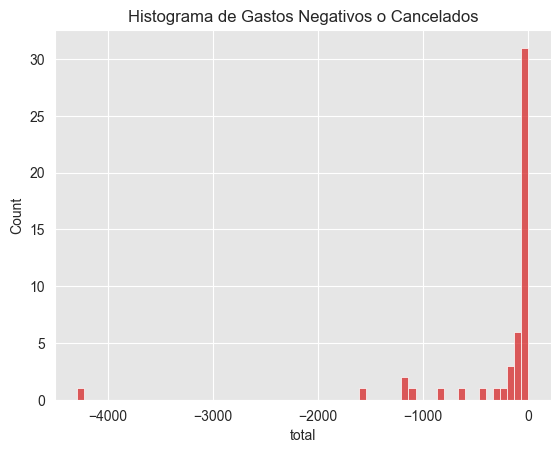

In [212]:
# Configurar el estilo de las gráficas
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Agrupar por usuario y hacer la suma de productos y precio total gastado
gp_1 = df_new.groupby('customer_id').agg({'total':'sum', 'quantity':'sum'})

# Usuarios con gastos negativos o menores a cero
sns.histplot(data=gp_1[gp_1['total']<=0], x='total', color='tab:red')
plt.title('Histograma de Gastos Negativos o Cancelados')
plt.show()

**CONCLUSIONES**

Este histograma muestra la cantidad de clientes que presentan gastos en negativo. El gasto negativo se aplica a los clientes que han realizado cancelaciones de sus pedidos, dado que los datos se recopilaron durante un periodo de tiempo específico esos datos se pueden referir a pedidos realizados antes de la fecha de recopilación de estos datos. 

Los clientes que se muestran en su mayoría, pertenecen a gastos en 0, significando que 31 clientes cancelaron todas sus facturas. En comparación a la cantidad de clientes total, es una parte mínima de clientes que se encuentran con gastos nulos o en negativo.

## <a id='toc4_2_'></a>[Productos más comprados](#toc0_)
Se realiza una observación sobre los productos que más se compran en general, esto puede servir como ayuda para saber en qué productos se concentran los clientes y puede ayudar a generar mayores ventas. Para realizar esta observación se hace una agrupación por el código de los productos, se suman las cantidades para conocer la frecuencia con la que se compran y se usa el precio máximo para después saber cuál de ellos proporciona mayor valor.

C:\Users\jfcom\AppData\Local\Temp\ipykernel_6308\2457573518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gp_code, x='quantity', y='description', palette='summer')


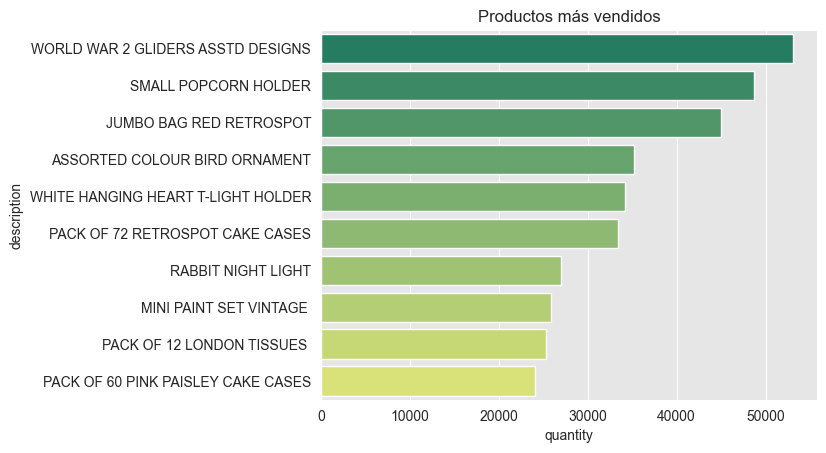

In [213]:
# Agrupar por código de stock y aplicar el primer nombre único por descripción, suma las columnas de cantidad y máximo del precio unitario. Ordenar desc. por cantidad. Sólo los 10 mayores.
gp_code = df_new.groupby('stock_code').agg({'description': lambda x:(x.unique().tolist()[0]), 'quantity':'sum', 'unit_price':'max'}).sort_values('quantity', ascending=False).head(10)

# Crear un gráfico de barras
sns.barplot(data=gp_code, x='quantity', y='description', palette='summer')
plt.title('Productos más vendidos')
plt.show()

**CONCLUSIONES**

La gráfica de barras muestra los 10 productos que han sido adquiridos con mayor frecuencia, eliminando las veces que se solicitó y se canceló el pedido. El producto más solicitado es el producto en la parte superior: 'World War 2 Gliders Asstd Designs' con más de 50,000 ventas totales.

También se puede apreciar el producto que menos se frecuenta entre los 10 mejores: 'Pack of 60 Pink Paisley Cake Cases' con poco menos de 25,000 unidades vendidas. Nos deja observar que hay una diferencia aproximada del doble de unidades entre el primero y el décimo más vendidos.

## <a id='toc4_3_'></a>[Precios de los productos más comprados](#toc0_)
Ahora que se ha observado la lista de los diez productos más comprados, se realizará una modificación al mismo grafico para conocer el producto que más valor tiene y deducir si genera mayores ganancias, dado que aunque un producto sea más comprado, no necesariamente proporciona la mayor cantidad de ganancias.

C:\Users\jfcom\AppData\Local\Temp\ipykernel_6308\1703555879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gp_code, x='unit_price', y='description', palette='Dark2')


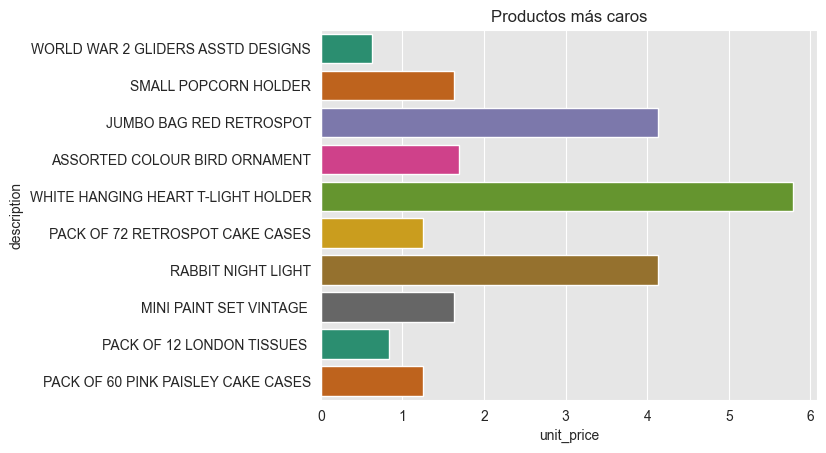

In [214]:
# Crear la visualización utilizando la agrupación anterior
sns.barplot(data=gp_code, x='unit_price', y='description', palette='Dark2')
plt.title('Productos más caros')
plt.show()

**CONCLUSIONES**

Gracias a la agrupación realizada sobre los productos más vendidos, podemos obtener el precio máximo con el que se venden los productos más solicitados. La grafica de barras ayuda a observar claramente las diferencias entre los precios de los productos.

Se puede ver que el producto que más se vende es el que tiene el menor precio máximo entre los 10 más vendidos con un valor aproximado de $0.6, mientras que el producto en el puesto 5 llega a ser el de mayor precio con casi $6. Mostrando que un menor precio puede ayudar a que los clientes elijan el producto en mayor cantidad.

## <a id='toc4_4_'></a>[Precios de los productos más caros](#toc0_)
Solo como una observación breve, se hace la agrupación para observar los productos más caros en general, dejando de lado la frecuencia con la que son comprados. Esto ayudaría a saber si estos productos llegan a ser parte de los más frecuentados o, por el contrario, no se tienen los mismos productos en lo absoluto.

In [215]:
# Realizar la agrupación, pero buscando el precio máximo unitario de la lista total de productos
df_new.groupby('stock_code').agg({'description': lambda x:(x.unique().tolist()[0]), 'unit_price':'max'}).sort_values('unit_price', ascending=False).head(10)

,description,unit_price
stock_code,,
M,Manual,38970.00
POST,POSTAGE,8142.75
D,Discount,1867.86
DOT,DOTCOM POSTAGE,1599.26
CRUK,CRUK Commission,1100.44
22502,PICNIC BASKET WICKER SMALL,649.50
22655,VINTAGE RED KITCHEN CABINET,295.00
22656,VINTAGE BLUE KITCHEN CABINET,295.00
22826,LOVE SEAT ANTIQUE WHITE METAL,195.00


**CONCLUSIONES**

Complementando con el análisis sobre el precio de los productos más comprados, se realiza la observación numerica de los precios máximos de los productos más caros. En este caso se observa que el producto 'Manual' contiene un precio demasiado elevado, por lo que puede referirse a un servicio de ayuda que se brinde a los clientes, siendo esta la razón de un precio tan elevado. Al igual que con los demás servicios ofrecidos.

Siendo así que en realidad es el producto: 'PICNIC BASKET WICKER SMALL' el que tiene el mayor precio unitario, con un valor de $649.50. De eso se observa que existe una gran diferencia entre los precios por servicios y los precios de los productos, siendo que ningún producto rebasa a los precios ofrecidos.

## <a id='toc4_5_'></a>[Región con más productos vendidos](#toc0_)

C:\Users\jfcom\AppData\Local\Temp\ipykernel_6308\4188828471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gp_2, y='region', x='quantity', palette='gist_earth')


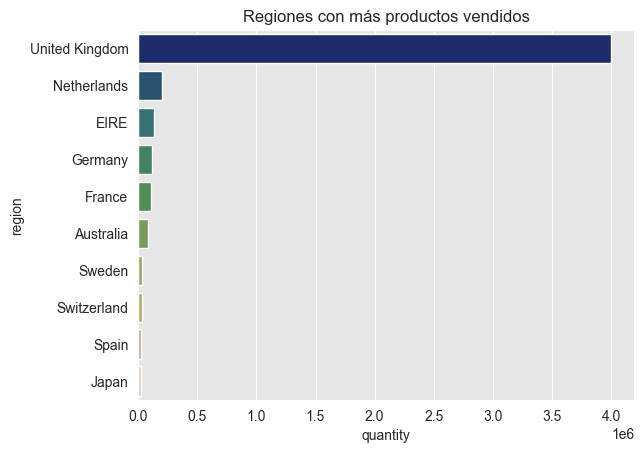

In [216]:
# Agrupar por región
region_df = df_new.groupby('region', as_index=False)

# Agregar funciones de suma a la cantidad y ordenar en forma descendente. Mostrar primeros 10
gp_2 = region_df.agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(10)

# Crear gráfico de barras
sns.barplot(data=gp_2, y='region', x='quantity', palette='gist_earth')
plt.title('Regiones con más productos vendidos')
plt.show()

**CONCLUSIONES**

Con una gran diferencia, la región del Reino Unido sobrepasa a todo el resto de regiones en ventas. Esto quiere decir que en esta región están concentrados la mayor parte de los clientes y puede ser la que mayores ganancias presente.

La cantidad de productos vendidos no necesariamente muestra que tiene mayor número de ventas, pues pueden ser productos de menor valor, sin embargo, puede servirnos de ayuda para sacar conclusiones sobre los clientes por region, dado que ahora sabemos que los clientes de esa región suelen pedir más productos que en el resto de regiones.

## <a id='toc4_6_'></a>[Regiones con clientes únicos](#toc0_)

C:\Users\jfcom\AppData\Local\Temp\ipykernel_6308\769763474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=gp_3, x='customer_id', y='region', palette='gist_earth')


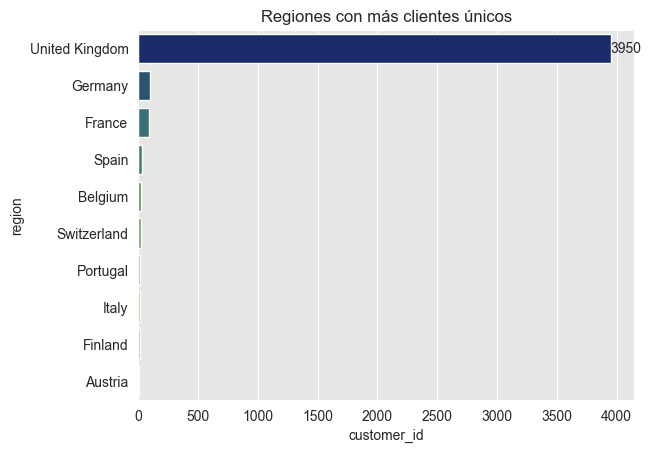

In [217]:
# Agregar por conteo de clientes únicos en cada región, y observar las 10 regiones con mayor cantidad
gp_3 = region_df.agg({'customer_id':pd.Series.nunique}).sort_values('customer_id', ascending=False).head(10)

# Crear grafico de barras y mostrar la cantidad
ax = sns.barplot(data=gp_3, x='customer_id', y='region', palette='gist_earth')
ax.bar_label(ax.containers[0])
plt.title('Regiones con más clientes únicos')
plt.show()

**CONCLUSIONES**

La grafica de barras muestra que la región del Reino Unido tiene la mayor cantidad de usuarios únicos y se observa la gran diferencia que existe en relación al resto de regiones. De aquí podemos concluir que las ventas tienen más alcance en esa región, quizás no se han implementado correctamente en el resto de regiones o no se hayan publicitado las ventas.

De igual manera se observa que el orden en el resto de regiones difiere en cuanto a la cantidad de productos vista en el gráfico anterior, por lo que la cantidad de clientes y de productos que se presentan por región puede afectar a las ganancias que se producen en cada una.

## <a id='toc4_7_'></a>[Ventas por región](#toc0_)

C:\Users\jfcom\AppData\Local\Temp\ipykernel_6308\4088489176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_df.agg({'total':'sum'}).sort_values('total', ascending=False).head(10)  , x='total', y='region', palette='gist_earth')


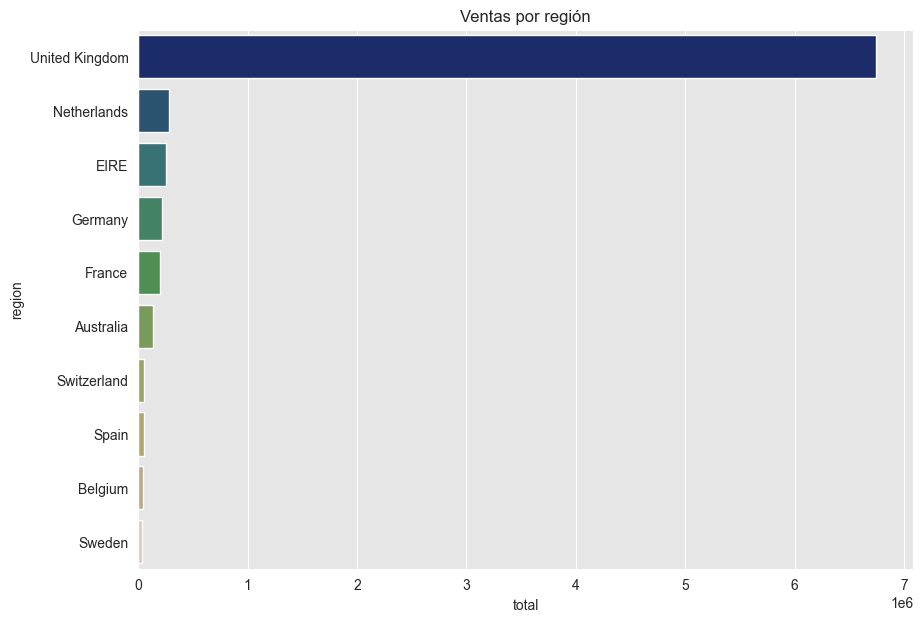

In [218]:
# Agregar la suma del total de ventas por región
plt.figure(figsize=(10,7))
sns.barplot(data=region_df.agg({'total':'sum'}).sort_values('total', ascending=False).head(10)  , x='total', y='region', palette='gist_earth')
plt.title('Ventas por región')
plt.show()

**CONCLUSIONES**

Finalmente, observamos las ventas totales por región. Gracias a los análisis anteriores, podríamos haber predicho que la región con mayor número de ventas es la región del Reino Unido, sin embargo, el resto de regiónes no siempre coinciden respecto a la cantidad de productos vendidos o el número de usuarios únicos para cada una.

Los análisis indicarían que los comportamientos de los usuarios por regiones varían en cuanto a cantidad de productos. También se observa la gran ventaja de la región del reino unido sobre el resto de regiones, por lo que sería recomendable aplicar técnicas similares para la promoción sobre las otras regiones y observar si existe un incremento de las ventas y clientes.

## <a id='toc4_8_'></a>[Ventas mensuales](#toc0_)

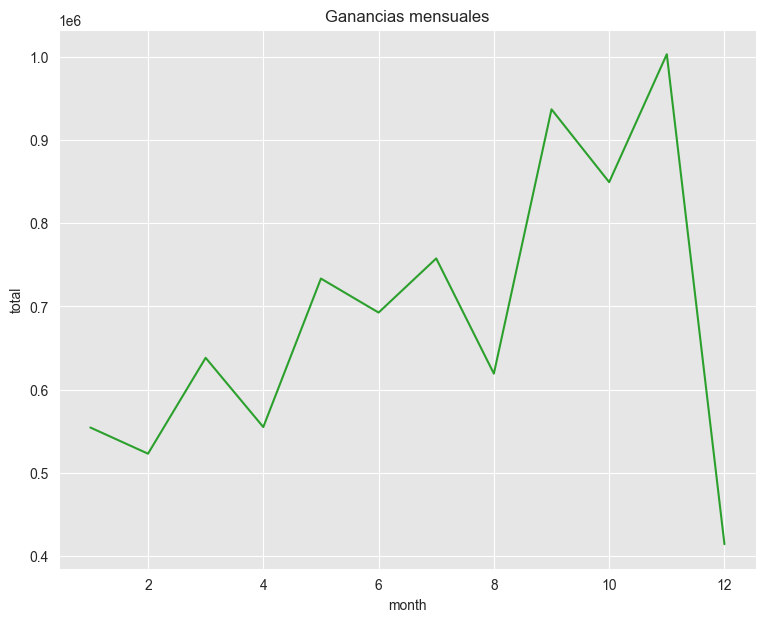

In [219]:
# Agrupar las ventas por mes y agregar suma sobre el total
gp_4 = df_new.groupby('month', as_index=False).agg({'total':'sum'})

# Crear gráfico de líneas
plt.figure(figsize=(9,7))
sns.lineplot(data=gp_4, x='month', y='total', color='tab:green')
plt.title('Ganancias mensuales')
plt.show()

**CONCLUSIONES**

En este gráfico se puede observar que las ventas van en incremento, aunque con meses de grande pérdidas, aparentemente cada 3 meses. Esto último no se puede asegurar, dado que solo se tienen los datos de un año y debería observarse si ese comportamiento se presenta periodicamente.

Las ventas son más altas durante el mes de Noviembre y más bajas entre los meses de Enero y Diciembre.

## <a id='toc4_9_'></a>[Ventas mensuales por región](#toc0_)

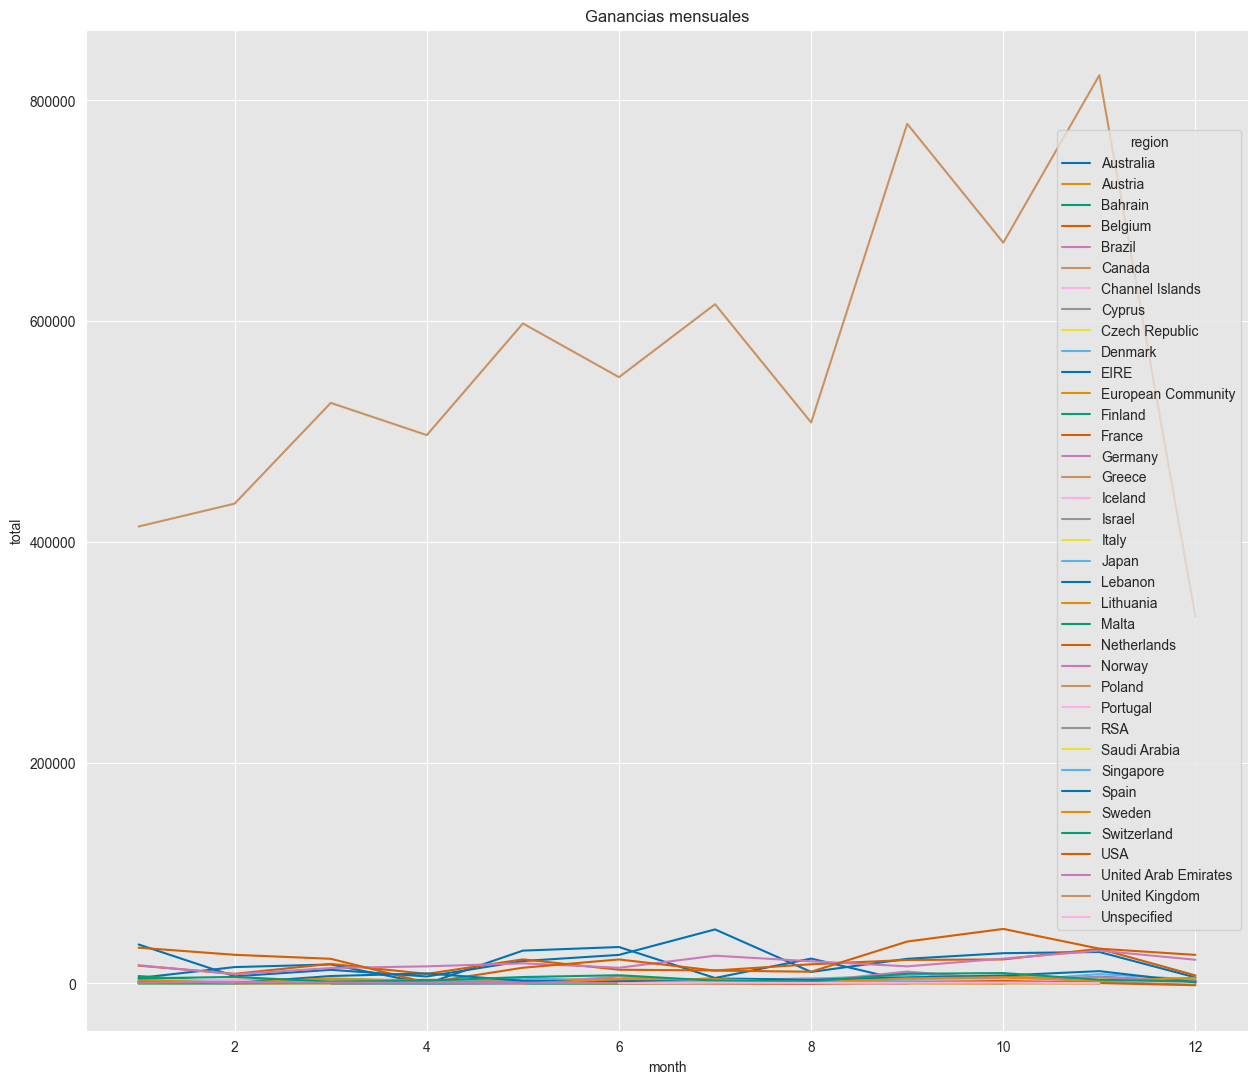

In [220]:
# Agrupar por región y por mes, agregar la suma del total de ventas
gp_5 = df_new.groupby(['region', 'month'], as_index=False).agg({'total':'sum'})

# Crear gráfico de líneas
plt.figure(figsize=(15,13))
sns.lineplot(data=gp_5, x='month', y='total', hue='region', palette='colorblind')
plt.title('Ganancias mensuales')
plt.show()

**CONCLUSIONES**

Gracias a esta gráfica se puede observar que las distintas regiones presentan picos de ventas en diferentes meses del año. Claramente la región del Reino Unido se presenta a un número de ventas mayor que el resto de las regiones, pero de igual manera se puede observar que existen bajas cantidades de ventas en el mes de Abril para la mayoría de las regiones. AL igual que se observan mayor cantidad de ventas en los finales del año. Solamente existen algunas regiones que presentan altas cantidades de ventas en los primeros meses del año.

## <a id='toc4_10_'></a>[Meses con más ventas](#toc0_)
Similar a lo que se realizó anteriormente, se realiza una agrupación de los datos usando la columna del mes en el que se registró el pedido. Pero en este caso, se utiliza un conteo de los productos únicos que se realizan en cada pedido. El análisis puede ponerse en contraste con el que se realizó anteriormente y observar que los datos registran el mes de noviembre como el mes con mayor cantidad de ventas.

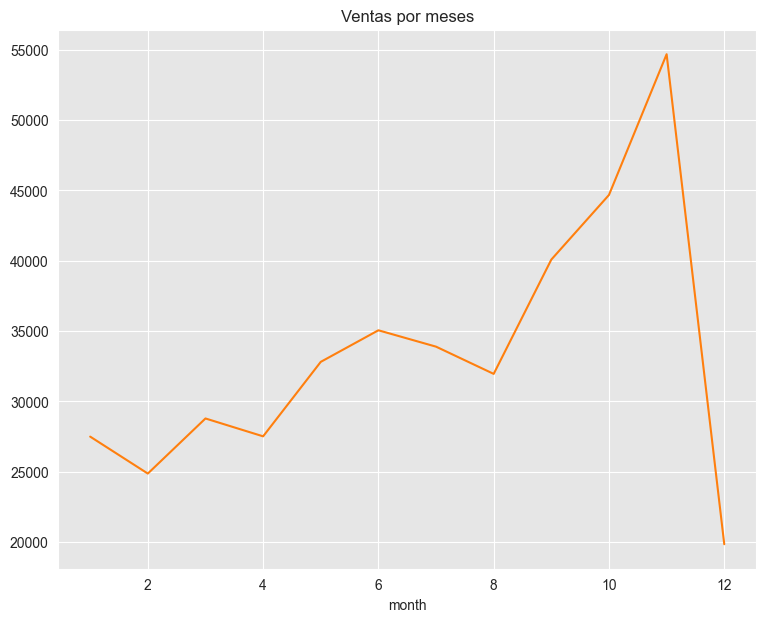

In [221]:
#Meses del año donde más se hicieron ventas
plt.figure(figsize=(9,7))
df_new.groupby('month')['invoice_date'].count().plot(kind = 'line', color='tab:orange')
plt.title('Ventas por meses')
plt.show()

**CONCLUSIONES**

De manera que podamos comprender mejor cómo se han hechos las ventas a lo largo del tiempo, la gráfica muestra como es que en los últimos meses empezando de Septiembre (9), el número de ventas incrementan enormemente, siendo la Noviembre (11) el punto cúspide de las ventas anuales. 

## <a id='toc4_11_'></a>[Horas con más ventas](#toc0_)

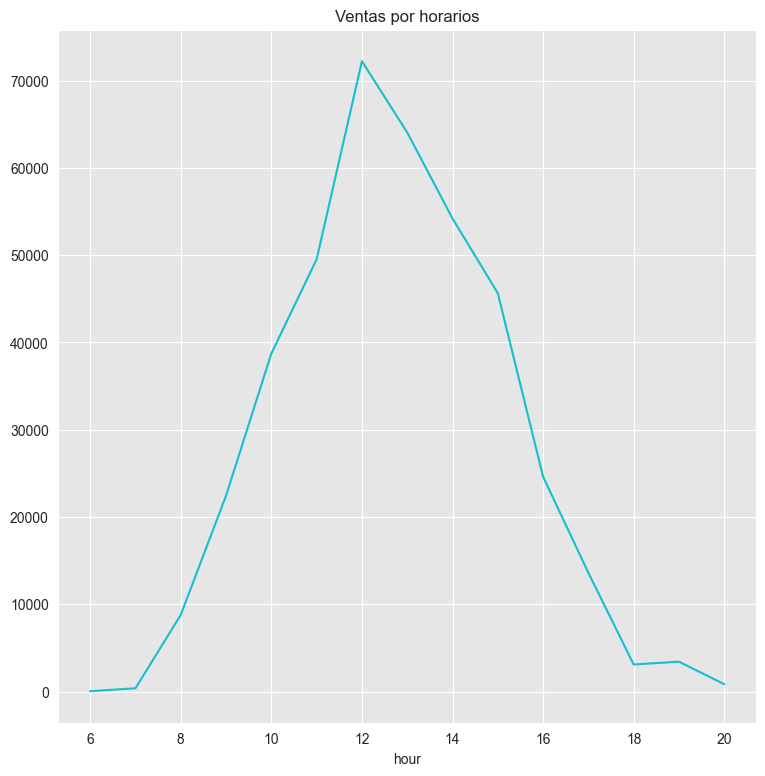

In [222]:
#Hora del día en la que más se hacen ventas
plt.figure(figsize=(9,9))
df_new.groupby('hour')['invoice_date'].count().plot(kind = 'line', color='tab:cyan')
plt.title('Ventas por horarios')
plt.show()

**CONCLUSIONES**

De manera similar al anterior, se realizó una gráfica que nos muestra el momento del día en el que más registros de compras se tiene. Como podemos observar, durante el día la actividad aumenta signitivamente, es decir, entre las 7am y las 6pm aproximadamente los clientes prefieren realizar sus compras con una preferencia particular hacia el medio día. 

## <a id='toc4_12_'></a>[Días de la semana con más ventas](#toc0_)

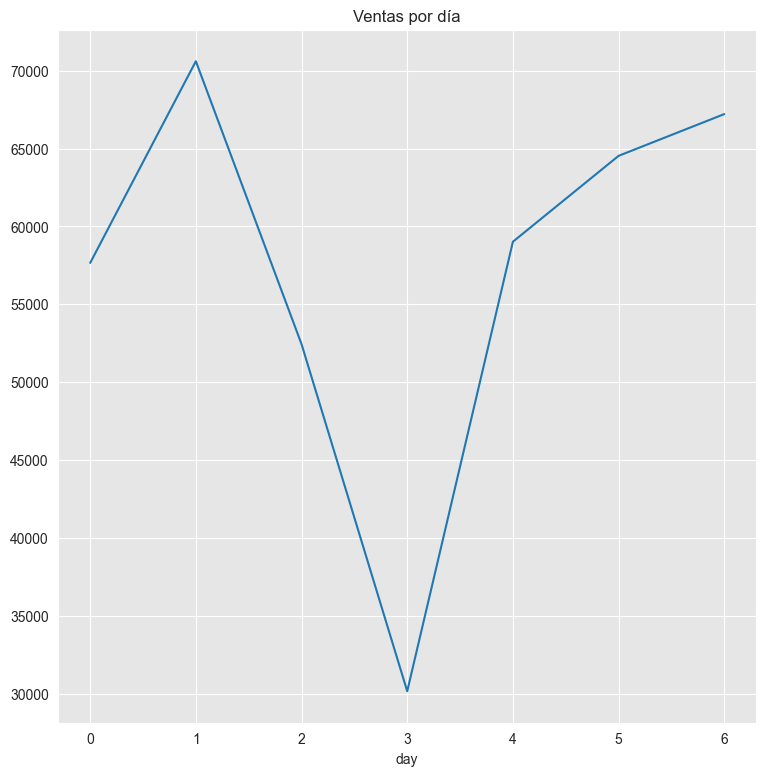

In [223]:
#Dias en los que se hacen más ventas
plt.figure(figsize=(9,9))
df_new.groupby('day')['invoice_date'].count().plot(kind = 'line')
plt.title('Ventas por día')
plt.show()

**CONCLUSIONES**

Para segmentar aún más el comportamiento de los clientes respecto al tiempo, se decidió realizar una gráfica que muestra en qué días de la semana los clientes tienden a realizar sus compras (siendo 0 = Domingo, 1 = Lunes y así sucesivamente). Por lo que se pued observar que, en general, todos los días tienen un número similar de ventas, a excepción del Miércoles, que curiosamente disminuye significavemente el interés de los clientes impacatando en sus compras o la cantidad de datos registrados para este día es menor.

Basándose en los resultados de las últimas tres gráficas, se observa que los clientes de la empresa prefieren realizar sus compras a finales de la semana, en un horario posterior al medio día. Siendo los últimos meses del año, a partir del mes Septiembre, los mejores para realizar alguna estrategia de marketing que busque maximizar las ganancias. 

## <a id='toc4_13_'></a>[Productos más vendidos en UK](#toc0_)

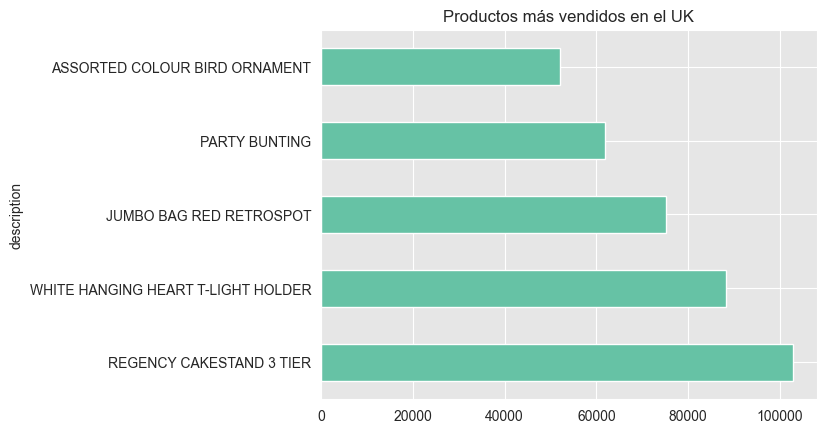

In [224]:
#Productos más comprados en Reino Unido anualmente
top_uk = df_new[df_new['region'] == 'United Kingdom']
top_uk.groupby('description')['total'].sum().sort_values(ascending = False).head(5).plot(kind='barh',cmap='Set2')
plt.title('Productos más vendidos en el UK')
plt.show()

**CONCLUSIONES**

Ya que Reino Unido es el país que realizó más del 90% de las compras durante todo el año, se decidió analizar que productos son los que más se ordenan. Siendo la base de postres y pasteles en el primer lugar, lo cuál tiene mucho sentido con la cultura del país, que acostumbra asignar una hora especial para tomar té y algún postre de su preferencia. Por lo tanto, se puede decir que las ventas sí se ven afectadas por las regiones en las que se realizan.

## CONCLUSIONES
Después de haber realizado el Análisis Estadístico de Datos, se conoce más acerca del comportamiento de los usuarios y cómo eso puede afectar las ventas. Así mismo se encontró una gran concentración de usuarios en la región del Reino Unido, siendo los principales consumidores y generadores de ingresos.

Se puede informar que los registros deben ser completados con más información del resto de regiones o mejorar las estrategias de marketing en las distintas regiones. Esto puede requerir un análisis diferente al que se realiza en esta ocasión, dado que ese no es todo el enfoque del proyecto. Aún así, cada región posé un comportamiento diferente en cuanto a la cantidad de compras realizadas, los productos y se puede inferir que en las fechas de compras también hay diferencias por región.

# <a id='toc5_'></a>[Construcción del modelo](#toc0_)

## <a id='toc5_1_'></a>[Creación de Tabla RFM](#toc0_)

Primero se creará una tabla con los valoresa RFM, en donde cada columna representará lo siguiente:

* Recency: Esta métrica permite observar la diferencia de días entre la última fecha registrada y la ultima fecha de compra que realizó el cliente.
 
* Frequency: Es la cantidad de compras que ha realizado el cliente, calculada haciendo la suma de la cantidad de compras que ha realizado.
 
* Monetary: Indica la cantidad de dinero gastado, sumando el total de gastos realizados en sus compras.

**Nota**: Para Recency se necesita aumentar en uno nuestra fecha máxima para obtener el valor del tiempo que ha transcurrido.

In [225]:
# Creación de nuestra última fecha
final_date = max(df_new['invoice_date']+ dt.timedelta(days=1))

In [238]:
# Creación de la tabla de rfm
rfm_df = df_new.groupby(['customer_id', 'region','continent']).agg(
    recency = ('invoice_date', lambda x: (final_date- x.max()).days),
    frecuency = ('invoice_no', 'count'),
    monetary = ('total', 'sum')
)

# Visualización de tabla
rfm_df

,,,recency,frecuency,monetary
customer_id,region,continent,,,
12346,United Kingdom,Europe,328,2,0.00
12347,Iceland,Europe,41,182,4310.00
12348,Finland,Europe,77,31,1797.24
12349,Italy,Europe,20,73,1757.55
12350,Norway,Europe,313,17,334.40
...,...,...,...,...,...
18280,United Kingdom,Europe,161,10,180.60
18281,United Kingdom,Europe,5,7,80.82
18282,United Kingdom,Europe,94,13,176.60


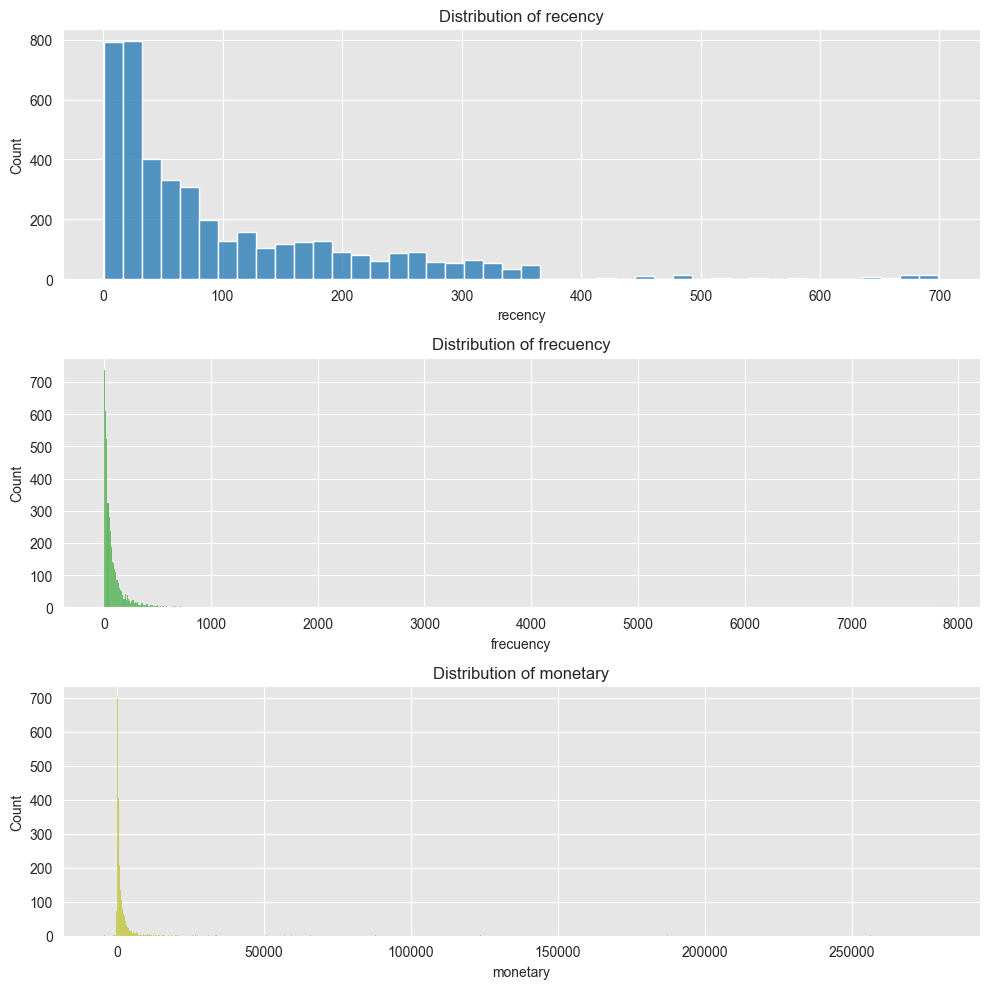

In [239]:
# Distribuciones de RFM
plt.figure(figsize=(10,10))
colors = ['tab:blue','tab:green','tab:olive']
for i, column in enumerate(rfm_df,1):
    plt.subplot(3,1,i)
    sns.histplot(rfm_df, x=column, color=colors[i-1])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Aqui se puede notar que existen altos valores cercanos a cero en las tres columnas, esto puede indicar que hay varios clientes con compras menores a 100 días, así mismo, la cantidad de compras por cliente es menor a 250 aunque existen clientes que han realizado una gran cantidad de compras; finalmente, la mayoría de los clientes ha gastado aproximadamente menos de $500 en sus compras.

A continuación se realiza una estandarización de los datos, debido a que se tienen valores extremos.

In [240]:
# Estandarización de datos
rfm_scaler = StandardScaler()

# Entrenamiento con la tabla
rfm_scaler.fit(rfm_df)

# Transformación de los datos
rfm_escaler_tr = rfm_scaler.transform(rfm_df) # np.log1p añade un uno para que todos los valores sean positivos

# Convertimos el resultado a un dataframe
rfm = pd.DataFrame(rfm_escaler_tr, columns= ['recency', 'frecuency', 'monetary'], index=rfm_df.index)

# Visualizamos datos
rfm.head(10)

,,,recency,frecuency,monetary
customer_id,region,continent,,,
12346,United Kingdom,Europe,1.977771,-0.391658,-0.230206
12347,Iceland,Europe,-0.536243,0.394362,0.294741
12348,Finland,Europe,-0.220897,-0.265021,-0.011307
12349,Italy,Europe,-0.720196,-0.081617,-0.016141
12350,Norway,Europe,1.846376,-0.326156,-0.189477
12352,Norway,Europe,-0.247176,0.014452,-0.041979
12353,Bahrain,Asia,0.900336,-0.382924,-0.219366
12354,Spain,Europe,1.154365,-0.147118,-0.098738
12355,Bahrain,Asia,-0.045704,-0.343623,-0.174253


Se utiliza el método del codo para determinar el valor óptimo de clusters en el modelo a utilizar (K-Means).

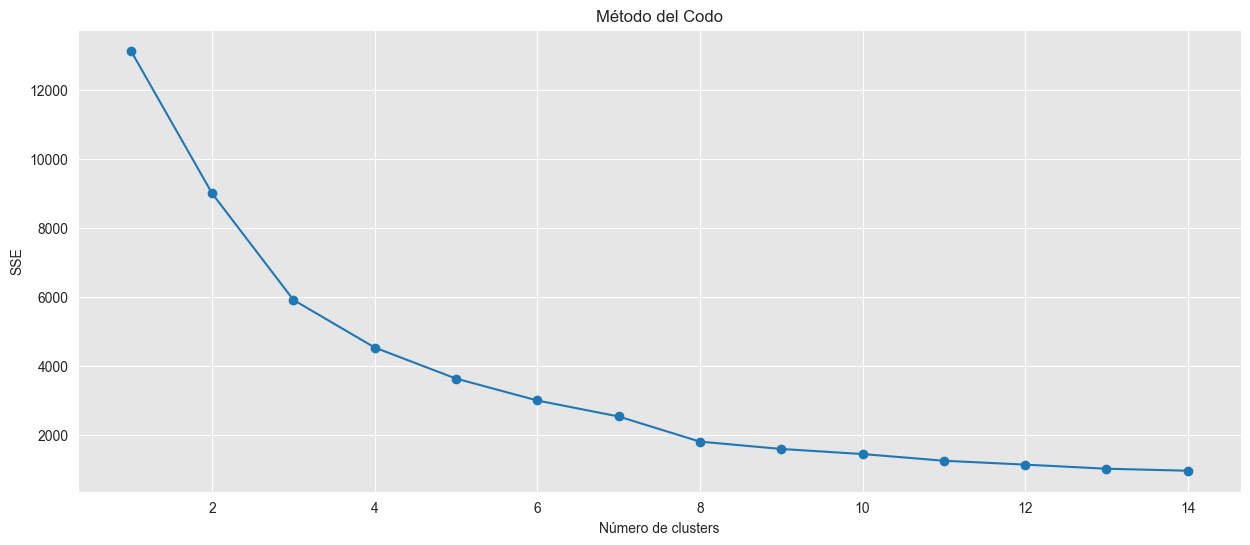

In [241]:
# Realización del método del codo
distortion = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=123456)
    kmeans.fit(rfm)
    distortion.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(15, 6))
plt.plot(range(1, 15),distortion, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

Se observa en la gráfica, que el método indica que el número óptimo es de 4 clústers. Gracias a esto se puede crear el modelo de aprendizaje no supervisado para realizar la segmentación de los clientes.

In [242]:
# Realización del modelo
kmeans = KMeans(n_clusters=4, random_state=123456, n_init='auto')

# Ajustar el modelo
kmeans.fit(rfm)

KMeans(n_clusters=4, random_state=123456)

In [243]:
# Creamos una nueva columna de categorias
rfm_df["cluster"] = kmeans.labels_

# Convirtiendo el tipo de datos a categorical
rfm_df["cluster"]=rfm_df["cluster"].astype("category")

rfm_df

,,,recency,frecuency,monetary,cluster
customer_id,region,continent,,,,
12346,United Kingdom,Europe,328,2,0.00,0
12347,Iceland,Europe,41,182,4310.00,2
12348,Finland,Europe,77,31,1797.24,2
12349,Italy,Europe,20,73,1757.55,2
12350,Norway,Europe,313,17,334.40,0
...,...,...,...,...,...,...
18280,United Kingdom,Europe,161,10,180.60,0
18281,United Kingdom,Europe,5,7,80.82,2
18282,United Kingdom,Europe,94,13,176.60,2


En la siguiente tabla se muestra como se segmentaron los grupos.

In [244]:
# definicion de segmentación
segmentation = rfm_df.groupby('cluster').agg(
    recency= ('recency', 'mean'),
    frecuency=('frecuency', 'mean'),
    monetary= ('monetary','mean')
).sort_values(by='recency').reset_index()

# Visualizamos tabla
segmentation.head()


,cluster,recency,frecuency,monetary
0,1,5.000000,5824.250000,64463.562500
1,3,9.000000,1022.833333,174719.183333
2,2,47.792291,104.228510,1990.764054
3,0,264.673933,28.562216,421.927684


Ahora gráficamente, se muestra el resultado de la formación de los grupos:

In [245]:
# Obtenemos los centroides de nuestros clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=rfm.columns)

# Añade una columna con el número de clúster
rfm['label'] = kmeans.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid', '3 centroid']
# Se necesitará reconfigurar el índice más tarde
scatter_data = pd.concat([rfm, centroids], ignore_index=True)

<Figure size 1100x1100 with 0 Axes>

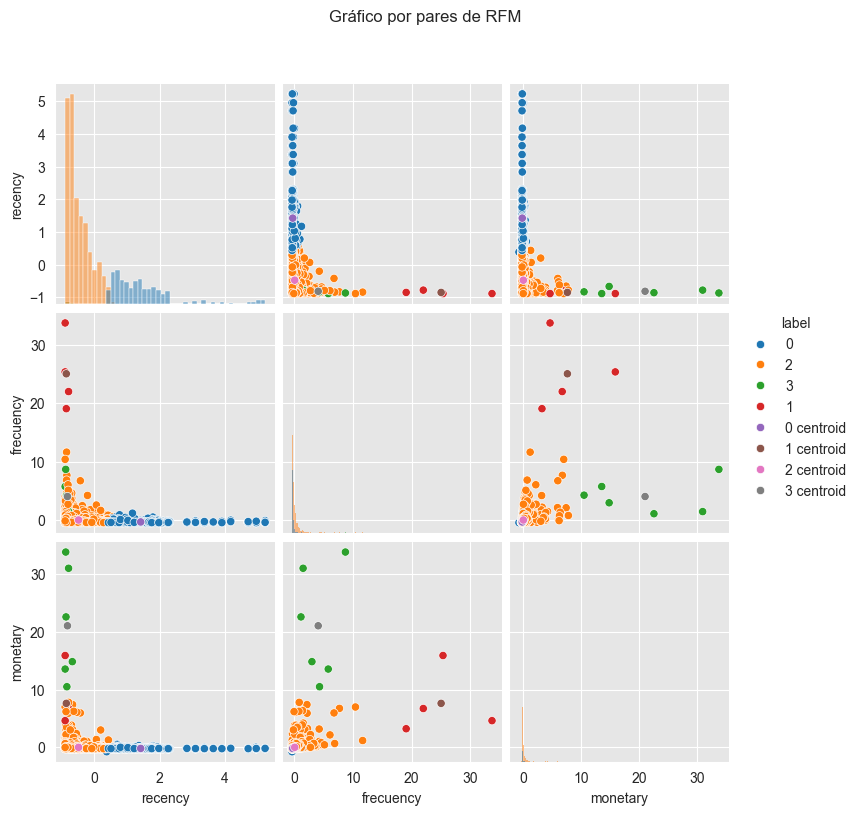

In [246]:
# Traza el gráfico
plt.figure(figsize=(11,11))
g = sns.pairplot(scatter_data, hue='label', diag_kind='hist')
g.fig.suptitle("Gráfico por pares de RFM", y=1.08)
plt.show()

Con lo que se puede observar en la tabla y el gráfico se pueden dividir los grupos como:
* El grupo etiquetado como 1: Catalogado como los clientes 'Platinum', ya que tienen un tiempo corto de compra, con mucha compras y un gasto elevado.
* El grupo 3: Etiquetado con los clientes 'Gold', tardan un poquito más en comprar con alta frecuencia y tambien gastan mucho.
* El grupo 2: Clientes 'Silver', que tardan más en comprar con frecuencia, compran menores cantidades y gastan mucho menos respecto a los grupos 1 y 3.
* El grupo 0: Será etiquetado como cliente 'Basic', son clientes que no se han cuativado tanto por los productos que se ofrecen.

Cambiaremos estos valores para una mejor comprensión de las tablas.

In [247]:
# Cambio en la tabla rfm_df
cluster_dict = {0: 'basic', 1:'platinum', 2:'silver', 3:'gold'}

# Cambio en la tabla rfm_df
rfm_df['cluster_meaning']=rfm_df['cluster'].replace(cluster_dict)

# Viualizamos cambios
rfm_df.head()


,,,recency,frecuency,monetary,cluster,cluster_meaning
customer_id,region,continent,,,,,
12346,United Kingdom,Europe,328,2,0.00,0,basic
12347,Iceland,Europe,41,182,4310.00,2,silver
12348,Finland,Europe,77,31,1797.24,2,silver
12349,Italy,Europe,20,73,1757.55,2,silver
12350,Norway,Europe,313,17,334.40,0,basic


In [248]:
# Cambio en la tabla segmentation
segmentation['cluster_meaning']=segmentation['cluster'].replace(cluster_dict)

# Viualizamos cambios
segmentation

,cluster,recency,frecuency,monetary,cluster_meaning
0,1,5.000000,5824.250000,64463.562500,platinum
1,3,9.000000,1022.833333,174719.183333,gold
2,2,47.792291,104.228510,1990.764054,silver
3,0,264.673933,28.562216,421.927684,basic


# <a id='toc6_'></a>[Conclusión Final](#toc0_)

En estre trabajo se encontraron algunos errores, sobre todo con una gran cantidad de valores ausentes sobre la columna de `customer_id`, al no poder imputarlos y estos afectar al resultado de la segmentación, se optó por eliminarlos; representando una perdida de aproximadamente 26% de los datos. Se corregieron los tipos de datos en algunas columnas y se creoaron nuevas columnas que ayudaron en el análisis y agrupación de datos.

En el análisis de los datos se encontró que había una baja cantidad de usuarios con pedidos cancelados o devueltos, también se observó que la región del Reino Unido cuenta con una alta cantidad de clientes que reprentan cerca del 90% de las ventas totales. Se observa el enfoque en el año para mejorar las estrategias de marketing en las distintas regiones y distintas temporadas, de esta manera se pueden incrementar las ganancias a lo largo del año. Al observar el comportamiento de los usuarios se observa que la mayoría prefiere realizar sus compras después del medio día y en los últimos días de la semana, con un aumento en las ventas para los meses entre Septiembre y Diciembre.

Para el modelo, se ha construido una tabla RFM con valores de Recency, Frecuency y Monetary, se le aplicó estandarización a los datos y se utilizó el modelo de K-Means para formar 4 grupos, en donde se definieron como: "Platinum", "Gold", "Silver" y  "Basic", ordenados del que proporciona mayores ganancias y con más frecuencia al peor, con menos ganancias y menor frecuencia. 

**Recomendaciones**:
Al estar catalogados, se puedn tommar diversas acciones como:
* Creación de un sistema de puntos para alcanzar distintos niveles, en donde se desbloquean descuentos exclusivos, envíos gratis, etc.
* Creación de campañas para mantener el interés de los niveles 'platinum' y 'gold'. Éstas pueden incluir descuentos a partir de ciertos montos, envíos bonificados o incluso crear un sistema de subscripción al cual adherirse. 
* Creación de campañas para incentivar más los clientes de nivel 'silver', como recordatorios de productos vistos con la aplicación o algún descuento.
* Creación de campañas para cautivar e incentivar más el nivel 'basic', como descuentos muy grandes en la primera compra, una prueba de alguna membresía entre otras.